In [91]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
state = 'PA'

# Open all models

### Predictions

In [78]:
predictions_date = {}
for model in ['sir', 'regression']:
    predictions[model] = {pd.to_datetime(f[3:11]): pd.read_csv(os.path.join(model,f), parse_dates = True, index_col = 'date')['pred_case'] for f in  os.listdir(model) if state in f}
    predictions[model] = pd.DataFrame({d: predictions[model][d] for d in sorted(predictions[model])})

In [79]:
ground_truth = pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv', parse_dates=['date'])[['date', 'state', 'positive']]
ground_truth = ground_truth[ground_truth.state == state]
ground_truth.index = ground_truth.date
ground_truth = ground_truth.sort_index()['positive']
ground_truth

date
2020-03-06        2.0
2020-03-07        4.0
2020-03-08        6.0
2020-03-09       10.0
2020-03-10       12.0
2020-03-11       16.0
2020-03-12       22.0
2020-03-13       41.0
2020-03-14       47.0
2020-03-15       63.0
2020-03-16       76.0
2020-03-17       96.0
2020-03-18      133.0
2020-03-19      185.0
2020-03-20      268.0
2020-03-21      371.0
2020-03-22      479.0
2020-03-23      644.0
2020-03-24      851.0
2020-03-25     1127.0
2020-03-26     1687.0
2020-03-27     2218.0
2020-03-28     2751.0
2020-03-29     3394.0
2020-03-30     4087.0
2020-03-31     4843.0
2020-04-01     5805.0
2020-04-02     7016.0
2020-04-03     8420.0
2020-04-04    10017.0
2020-04-05    11510.0
2020-04-06    12980.0
2020-04-07    14559.0
2020-04-08    16239.0
2020-04-09    18228.0
Name: positive, dtype: float64

Columns are the date used for training, index are the date at which it is evaluated

In [80]:
predictions['sir']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03
date,,,,,,,
2020-03-06,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
2020-03-07,4.620555,4.623098,4.651515,4.650840,4.602894,4.609129,4.593692
2020-03-08,8.054014,8.063145,8.166291,8.163828,7.990171,8.012643,7.957113
2020-03-09,12.552204,12.574099,12.824518,12.818515,12.397776,12.451956,12.318367
2020-03-10,18.444724,18.488524,18.996679,18.984444,18.132330,18.241532,17.972927
2020-03-11,26.162790,26.241676,27.172149,27.149646,25.592097,25.790776,25.303382
2020-03-12,36.270268,36.402783,37.996483,37.957763,35.294024,35.632312,34.804867
2020-03-13,49.503966,49.715567,52.319754,52.256189,47.908520,48.458446,47.117730
2020-03-14,66.825816,67.150491,71.258697,71.157947,64.304021,65.167954,63.069404


### Remove training data

In [81]:
for model in predictions:
    for c in predictions[model].columns:
        predictions[model].loc[predictions[model].index <= c, c] = np.nan
    predictions[model] = predictions[model].dropna(how='all')

In [82]:
predictions['sir']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03
date,,,,,,,
2020-03-29,3623.746279,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,4546.342076,4313.124825,NaN,NaN,NaN,NaN,NaN
2020-03-31,5641.675425,5265.191620,5055.306286,NaN,NaN,NaN,NaN
2020-04-01,6911.743028,6329.739761,5820.424463,5827.857217,NaN,NaN,NaN
2020-04-02,8344.744309,7482.578485,6570.001436,6583.848199,6778.970872,NaN,NaN
2020-04-03,9912.646550,8688.614193,7276.544435,7297.786543,7950.844256,8137.205350,NaN
2020-04-04,11571.569936,9905.589907,7918.747621,7947.894296,9168.180855,9343.278385,9667.428582
2020-04-05,13265.761800,11089.781979,8483.506665,8520.575410,10390.259498,10540.609985,11168.231127
2020-04-06,14934.690690,12202.103668,8965.946638,9010.535843,11575.797980,11688.797278,12686.794718


### Compute difference

In [83]:
for model in predictions:
    for c in predictions[model].columns:
        predictions[model][c] -= ground_truth[predictions[model].index]
        predictions[model][c] = predictions[model][c] .abs()

/home/vincent/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/vincent/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [84]:
predictions['sir']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03
date,,,,,,,
2020-03-29,229.746279,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,459.342076,226.124825,NaN,NaN,NaN,NaN,NaN
2020-03-31,798.675425,422.191620,212.306286,NaN,NaN,NaN,NaN
2020-04-01,1106.743028,524.739761,15.424463,22.857217,NaN,NaN,NaN
2020-04-02,1328.744309,466.578485,445.998564,432.151801,237.029128,NaN,NaN
2020-04-03,1492.646550,268.614193,1143.455565,1122.213457,469.155744,282.794650,NaN
2020-04-04,1554.569936,111.410093,2098.252379,2069.105704,848.819145,673.721615,349.571418
2020-04-05,1755.761800,420.218021,3026.493335,2989.424590,1119.740502,969.390015,341.768873
2020-04-06,1954.690690,777.896332,4014.053362,3969.464157,1404.202020,1291.202722,293.205282


### Relative dataframe

Computing with regard to the start date

In [85]:
predictions_relative = {}
for model in predictions:
    predictions_relative[model] = predictions[model].copy()
    for c in predictions[model].columns:
        predictions_relative[model][c] = predictions_relative[model][c].shift(-predictions_relative[model][c].isnull().sum())
    predictions_relative[model].index = np.arange(len(predictions_relative[model]))

In [86]:
predictions_relative['sir']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03
0,229.746279,226.124825,212.306286,22.857217,237.029128,282.794650,349.571418
1,459.342076,422.191620,15.424463,432.151801,469.155744,673.721615,341.768873
2,798.675425,524.739761,445.998564,1122.213457,848.819145,969.390015,293.205282
3,1106.743028,466.578485,1143.455565,2069.105704,1119.740502,1291.202722,386.100460
4,1328.744309,268.614193,2098.252379,2989.424590,1404.202020,1805.063851,658.406878
5,1492.646550,111.410093,3026.493335,3969.464157,1870.633242,2526.874959,NaN
6,1554.569936,420.218021,4014.053362,5139.616564,2538.504925,NaN,NaN
7,1755.761800,777.896332,5191.030384,6485.491643,NaN,NaN,NaN
8,1954.690690,1346.120626,6542.874353,NaN,NaN,NaN,NaN
9,1962.471564,2134.828899,NaN,NaN,NaN,NaN,NaN


# Prediction in x days

What is the error if the model tries to predict in x days ?

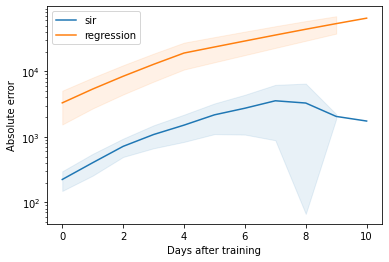

In [120]:
for model in predictions_relative:
    std = predictions_relative[model].std(axis = 1)
    mean = predictions_relative[model].mean(axis = 1)
    interval = 1.96 * std / np.sqrt(predictions_relative[model].notna().sum(axis = 1))
    
    ax = mean.plot(label = model)
    plt.fill_between(mean.index, mean + interval, mean - interval, color = ax.get_lines()[-1].get_color(), alpha=.1)
plt.xlabel("Days after training")
plt.ylabel("Absolute error")
plt.yscale('log')
plt.legend()
plt.show()

# Prediction for x days 

What is the average error for the following x days ?

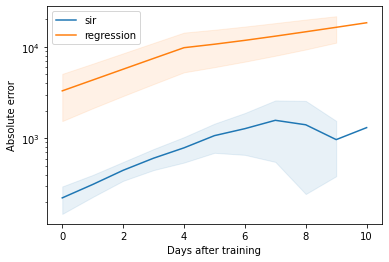

In [118]:
for model in predictions_relative:
    mean_matrix = predictions_relative[model].rolling(len(predictions_relative[model]), min_periods=1).mean()
    mean_matrix[predictions_relative[model].isnull()] = np.nan
    std = mean_matrix.std(axis = 1)
    mean = mean_matrix.mean(axis = 1)
    interval = 1.96 * std / np.sqrt(mean_matrix.notna().sum(axis = 1))
    
    ax = mean.plot(label = model)
    plt.fill_between(mean.index, mean + interval, mean - interval, color = ax.get_lines()[-1].get_color(), alpha=.1)
plt.xlabel("Days after training")
plt.ylabel("Absolute error")
plt.yscale('log')
plt.legend()
plt.show()

# Prediction for given date

What is the predictions that my model does for a given date ? Large variance indicates that the model changed 

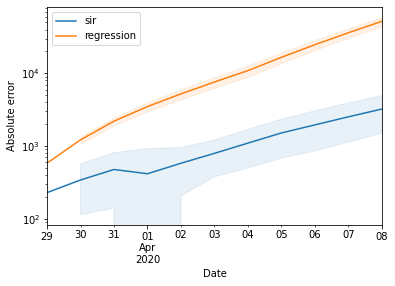

In [119]:
for model in predictions:
    std = predictions[model].std(axis = 1)
    mean = predictions[model].mean(axis = 1)
    interval = 1.96 * std / np.sqrt(predictions[model].notna().sum(axis = 1))
    
    ax = mean.plot(label = model)
    plt.fill_between(mean.index, mean + interval, mean - interval, color = ax.get_lines()[-1].get_color(), alpha=.1)
    
plt.xlabel("Date")
plt.ylabel("Absolute error")
plt.yscale('log')
plt.legend()
plt.show()

# Prediction until given date

What is the average error until a given date ?

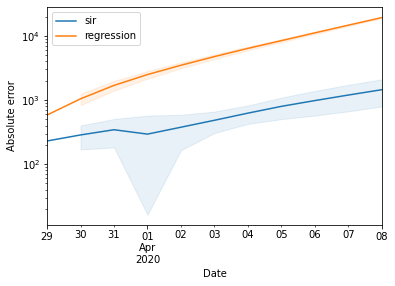

In [115]:
for model in predictions:
    mean_matrix = predictions[model].rolling(len(predictions[model]), min_periods=1).mean()
    mean_matrix[predictions[model].isnull()] = np.nan
    std = mean_matrix.std(axis = 1)
    mean = mean_matrix.mean(axis = 1)
    interval = 1.96 * std / np.sqrt(mean_matrix.notna().sum(axis = 1))
    
    ax = mean.plot(label = model)
    plt.fill_between(mean.index, mean + interval, mean - interval, color = ax.get_lines()[-1].get_color(), alpha=.1)
plt.xlabel("Date")
plt.ylabel("Absolute error")
plt.yscale('log')
plt.legend()
plt.show()